## * 통계적 가설 검정
## - 표본을 통해 얻은 정보를 이용하여 모집단의 특성에 대한 가설의 진위를 판단하는 과정
### 1) 가설 수립
### - 가설 검정의 목적 확인
### - 새롭게 주장하고자 하는 판단 결과를 대립가설(H1), 그 반대를 귀무가설(H0)로 결정
### - 유의수준(α)을 결정함(보통 5% 혹은 1%)
### 2) 가설 검정의 수행
### - 적절한 검정통계량을 결정함(t, F, x^2) 
### - 데이터로부터 검정통계량을 계산함
### - 데이터로부터 p-value를 계산함
### - 데이터로부터 p-value를 계산함
### 3) 검정결과의 판단
### - 검정통계량>임계값이면 H0을 기각, 검정통계량<임계값이면 H0을 기각할 수 없음
### - p-value<유의수준(α)이면 H0을 기각, p-value>유의수준(α)이면 H0을 기각할 수 없음

## 실습 1) 평균 검정(모집단 표준편차를 모르는 경우)

### 고객 서비스센터의 고객만족도 평균은 78.0이다. 개선활동을 완료한 후 다음과 같은 10개의 고객만족도 
### 데이터를 얻었다. 개선활동이 만족도를 변화시켰는가?(a=0.05) ->같다/다르다이므로 양측검정,, a=0.05

In [34]:
import numpy as np
from scipy import stats
import pandas as pd

df=pd.DataFrame({'sample':[85.0, 79.0, 79.1, 79.9, 81.6, 78.6, 85.4, 83.4, 78.1, 79.2]})
t_result=stats.ttest_1samp(df, 78.0)
t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
print("1-Sample t-test")
print("t 통계량 : {}".format(t))
print("p-value:{}".format(p))

1-Sample t-test
t 통계량 : [3.379]
p-value:[0.008]


### 1. 평균 검정이란?
#### 모집단에서 추출된 표본의 통계량(평균, 표준편차 등)을 이용하여 모집단의 평균의 차이에 대한 검정
#### 일반적으로 두 집단의 평균의 차이가 유의한지 통계적으로 검증하는 기법
### 2. 검정
#### 1) 가설 수립 및 유의수준 설정
#### 귀무가설(H0) : 개선활동이 만족도를 변화시켰다고 할 수 없다. 
#### 대립가설(H1) : 개선활동이 만족도를 변화시켰다고 할 수 있다.
#### 유의수준(α) : 0.05 -> 일반적으로 쓰는 유의수준 %를 따랐다.
#### 2) 가설검정 수행
#### 1 sample t-test를 통해 검정통계량 t값과 p-value값을 구했더니 각각 3.379와 0.008이 나왔다.
#### 임계값을 알 수 없으므로 p-value로 비교한다.
#### 3) 검정결과 판단
#### p-value<유의수준(0.025)보다 낮으므로 H0을 기각한다고 볼 수 있다.
### 3. 결론
#### 유의수준 5%에서 검정결과 p-value 값이 0.008이므로 H0을 기각한다고 볼 수 있으므로 개선활동이 고객만족도를 변화시켰다고 할 수 있다.

## 실습 2) 2 Sample t-test


### 제품을 A공급자와 B공급자로부터 제품을 받아 두께를 측정해서 다음의 데이터를 얻었다.
### 공급자간에 모평균에 차이가 있다고 할 수 있는가?(유의수준 a=0.05)

In [114]:
import numpy as np
from scipy import stats
import pandas as pd
from scipy.stats import shapiro
df1=pd.DataFrame({'sample A':[1.883, 1.715, 1.799, 1.768, 1.711, 1.832, 1.427, 1.344]})
df2=pd.DataFrame({'sample B':[1.435, 1.572, 1.486, 1.511, 1.457, 1.548, 1.404, 1.883]})
print(shapiro(df1)) # df1의 p-value값은 0.05보다 커서 정규성을 띔
print(shapiro(df2)) # df2는 p-value값이 0.05보다 작아서 정규성을 안띄어서 진행할 수 있을까? 
t_result=stats.ttest_ind(df1, df2)
t, p=t_result.statistic.round(3), t_result.pvalue.round(3)
print("2-Sample t-test")
print("t:{}".format(t))
print("p:{}".format(p))

ShapiroResult(statistic=0.8425756096839905, pvalue=0.08004552870988846)
ShapiroResult(statistic=0.7734811902046204, pvalue=0.014793740585446358)
2-Sample t-test
t:[1.7]
p:[0.111]


### 1. 평균 검정_2 sample t-test란?
#### 두 집단에 대한 평균 차이를  검정
#### 두 확률표본은 두 모집단으로부터 각기 독립적으로 관측되었을 때 독립 2표본 검정을 사용
#### 정규성 검정과 등분산성 검정(F-Test, Levene's Test)이 있다.
#### 가설 설정은 
#### - 귀무가설(H0) : 두 집단의 평균은 동일
#### - 대립가설(H1) : 두 집단의 평균은 다름
### 2. 검정
#### 1) 가설 수립 및 유의수준 설정
#### 귀무가설( H0) : 두 모집단의 평균은 동일
#### 대립가설(H1) : 두 모집단의 평균은 다름
#### 유의수준(α) : 0.05 -> 일반적으로 쓰는 유의수준 %를 따랐다.
#### 2) 가설검정 수행
#### print("df1의 정규성 검정 : ", shapiro(df1))
#### print("df2의 정규성 검정 : ", shapiro(df2))
#### print("등분산성 검정 : ", df1['sample A'], df2['sample B']) 등을 통해 정규성과 등분산성을 확인해 볼 수 있다.
#### 2 sample t-test를 통해 검정통계량 t값과 p-value값을 구했더니 각각 1.7와 0.111이 나왔다.
#### 3) 검정결과 판단
#### 결과가 동일하다/다르다의 형태이기 때문에 유의수준은 α/2가 되고, p-value(0.111)<유의수준(0.025)이므로 H0을 기각한다고 볼 수 있다.
### 3. 결론
#### 유의수준 5%에서 검정결과 p-value 값이 0.111이므로 공급자 간 제품의 두께가 차이가 있다고 볼 수 있다.

## 실습 3) Paired t-test


### 회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다.
### 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [50]:
# 예제)
import numpy as np
from scipy import stats
import pandas as pd

# df1, df2를 직접 입력
df1=pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2=pd.DataFrame({'after':[810, 670, 790, 712, 810, 670, 790, 712, 790, 712]})
#print(df2.mean())
# Paired t-test
t_result=stats.ttest_rel(df1, df2)

# Paird t-test
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("Paired t-test")
print(" t: {}".format(t))
print(" p: {}".format(p))

Paired t-test
 t: [-5.324]
 p: [0.]


### 회사원 10명에 대해 영어점수가 학원가기 전의 점수와 학원수강 후에 영어점수가 짝을 이루고 있다.
### 회사원들의 성적은 학원가기 전후에 대해 차이가 있는지 검정하라.

In [49]:
# 실습)
import numpy as np
from scipy import stats
import pandas as pd

# df1, df2를 직접 입력
df1=pd.DataFrame({'before':[720, 589, 780, 648, 720, 589, 780, 648, 780, 648]})
df2=pd.DataFrame({'after':[710, 580, 787, 712, 750, 600, 782, 670, 790, 680]})
#print(df1.mean())
#print(df2.mean())
# Paired t-test
t_result=stats.ttest_rel(df1, df2)

# Paird t-test
t, p = t_result.statistic.round(3), t_result.pvalue.round(3)
print("Paired t-test")
print(" t: {}".format(t))
print(" p: {}".format(p))


Paired t-test
 t: [-2.266]
 p: [0.05]


### 1. 평균 검정_Paired t-test란?
#### 앞/뒤, 전/후 간의 비교를 하여 차이가 있는지 검정하기 위해 사용한다.
#### 집단의 차이를 검정하는 2 sample t-test와 달리 paired t-test는 하나의 단위의 차이를 검정한다.
#### 가설 설정은
#### 귀무가설(H0) : 전/후의 평균 차이가 없음
#### 대립가설(H1) : 전/후의 평균 차이가 있음
### 2. 검정
#### 1) 가설 수립 및 유의수준 설정
#### 귀무가설(H0) : 회사원들의 성적은 학원가기 전/후의 차이가 없다.
#### 대립가설(H1) : 회사원들의 성적은 학원가기 전/후의 차이가 있다.
#### 유의수준(α) : 0.05 -> 일반적으로 쓰는 유의수준 %를 따랐다.
#### 2) 가설검정 수행
#### Paired t-test를 통해 검정통계량 t값과 p-value값을 구했더니 각각 -2.266와 0.05가 나왔다.
#### print(df2.mean()) 함수를 통해 앞의 예제에서 df2의 데이터 평균은 746.6이고 실습에서 df2의 데이터 평균을 구했더니 706.1이다.
#### df1의 평균은 690.2인데 실습에서의 데이터 평균이 더 가까운 것을 알 수 있다.
#### 두 집단의 평균의 차이가 없을수록 t는 증가하고, p-value는 작아진다.
#### 3) 검정결과 판단
#### 결과가 있다/없다의 형태이기 때문에 유의수준은 α/2가 되고, p-value(0.05)>유의수준(0.025)이므로 H0을 기각할 수 없다고 볼 수 있다.
### 3. 결론
#### 유의수준 5%에서 검정결과 p-value값이 0.05이므로 학원 수강 전후의 점수는 차이가 없다고 볼 수 있다.

## 실습 4) 1 Proportion 


### 동전이 정상적인가를 검정하기 위해 100번을 던져본 결과, 앞면이 40번 나왔으며 뒷면이 60번 나왔다.
### 이 동전은 정상인가를 유의수준 a=0.05로써 검정하라.
### 정상적인 동전을 던질 때, 앞면이 나올 확률은 50%이다.

In [52]:
from statsmodels.stats.proportion import proportions_ztest
count=40
n_obs=100
value=0.5
stat, pval=proportions_ztest(count, n_obs, value)
print(" Proportion test")
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

 Proportion test
z:-2.041
p:0.041


### 1. Proportion test란?
#### 한 집단의 비율이 특정 비율과 같은지 비교
#### 가설 설정은
#### 귀무 가설(H0) : 모집단 비율(p)이 귀무가설에서의 비율(p0)과 같다.
#### 대립 가설(H1) : 모집단 비율(p)이 귀무가설에서의 비율(p0)과 다르다.
### 2. 검정
#### 1) 가설 수립 및 유의수준 설정
#### 귀무가설(H0) : 동전이 앞면이 나올 확률(50%)이 100번 동전을 던졌을 때의 비율과 같다.
#### 대립가설(H1) : 동전이 앞면이 나올 확률(50%)이 100번 동전을 던졌을 때의 비율과 다르다.
#### 유의수준(α) : 0.05 -> 일반적으로 쓰는 유의수준 %를 따랐다.
#### 2) 가설검정 수행
####  Proportion test를 통해 Z값과 p-value값을 구했더니 각각 -2.041와 0.041이 나왔다.
#### 3) 검정결과 판단
#### 크다/작다의 형태이기 때문에 유의수준은 α가 되고, p-value(0.041)>유의수준(0.05)이므로 H0을 기각한다.
### 3. 결론
#### 100번 동전을 던질 때, 동전 앞면이 나올 확률이 50%라고 볼 수 없다. 만약 횟수가 크게 증가한다면 모집단의 비율에 근사할 것으로 볼 수 있다.

## 실습 5) 2 Proportion 


### 동일한 제품을 생산하는 두 공장에서 불량률을 측정한 결과 아래와 같다.
### 두 공정의 불량률이 같다고 할 수 있는가? (유의수준 a=0.05)

In [51]:
import numpy as np
from statsmodels.stats.proportion import proportions_ztest
count=np.array([14,5])
nobs=np.array([1200,1200])

stat, pval=proportions_ztest(count, nobs)
print(" Proportion test")
print('z:{0:0.3f}'.format(stat))
print('p:{0:0.3f}'.format(pval))

 Proportion test
z:2.073
p:0.038


### 1. 2 Proportion test란?
#### 두 집단의 비율이 특정 비율과 같은지 비교
#### 가설 설정은
#### 귀무 가설(H0) : 두 집단의 비율은 같다.
#### 대립 가설(H1) : 두 집단의 비율은 같지 않다.
### 2. 검정
#### 1) 가설 수립 및 유의수준 설정
#### 귀무가설(H0) : 두 공장의 불량률은 같다.
#### 대립가설(H1) : 두 공장의 불량률은 같지 않다.
#### 유의수준(α) : 0.05 -> 일반적으로 쓰는 유의수준 %를 따랐다.
#### 2) 가설검정 수행
####  2 Proportion test를 통해 Z값과 p-value값을 구했더니 각각 2.073와 0.038이 나왔다.
#### 3) 검정결과 판단
#### p-value(0.038)>유의수준(0.05)이므로 H0을 기각한다.
### 3. 결론
#### 두 공장의 불량률은 차이가 없다고 볼 수 있다.

## 실습 6) 카이제곱

### 노트북 컴퓨터의 6가지 제품(A,B,C,D,E,F)에 대하여 7가지 제품의 이미지를 중복 선택할 수 있도록 
### 32명의 소비자를 대상으로 설문 조사한 Table이다. 각 제품에 대해 이미지에 대해 차이가 있겠는가?(유의수준 a=0.05)

In [104]:
import numpy as np
from scipy import stats
import scipy.stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
df=pd.DataFrame({'A/S':[18,8,4,4,3,3],
                  'price':[1,2,1,1,1,25],
                  'perf':[8,14,3,2,3,8],
                  'extend' :[7,5,4,3,1,10],
                  'design':[10,5,9,2,1,2],
                  'stab':[9,9,5,7,1,1],
                  'func':[10,4,4,3,1,7]})

chi, pval, dof, expected=stats.chi2_contingency(df.T)

print("chi-square test")
print('chisq: {0:0.3f}'.format(chi))
print('p:{0:0.3f}'.format(pval))
print('degree pf freedom:{}'.format(dof))
print('expected value: \n{}'.format(expected.round(3)))

chi-square test
chisq: 98.274
p:0.000
degree pf freedom:30
expected value: 
[[11.004  8.21   5.24   3.843  1.921  9.782]
 [ 8.528  6.362  4.061  2.978  1.489  7.581]
 [10.454  7.799  4.978  3.651  1.825  9.293]
 [ 8.253  6.157  3.93   2.882  1.441  7.336]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]
 [ 8.803  6.568  4.192  3.074  1.537  7.825]
 [ 7.978  5.952  3.799  2.786  1.393  7.092]]


### 1. 카이제곱 검정이란?
#### 관찰된 빈도가 기대되는 빈도와 의미 있게 다른지의 여부를 검증하는 검증방법
#### 가설 설정은
#### 귀무가설(H0) : 실측치 대비 기대치의 차이가 작다 -> 검정통계량이 작다
#### 귀무가설(H1) : 실측치 대비 기대치의 차이가 크다 -> 검정통계량이 크다
### 2. 검정
#### 1) 가설 수립 및 유의수준 설정
#### 귀무가설(H0) : 제품에 대한 선호도는 이미지별 차이가 없다.
#### 대립가설(H1) : 제품에 대한 선호도는 이미지별 차이가 존재한다.
#### 유의수준(α) : 0.05 -> 일반적으로 쓰는 유의수준 %를 따랐다.
#### 2) 가설검정 수행
#### 차이가 없다 = 분산이 0이므로 0에서 출발해서 단측검정이 되버린다.
#### 차이가 있다 = 분산이 존재하므로 기준값이 0보다 커서 양측검정이 되버린다.
#### 3) 검정결과 판단
#### p-value(0.000)<유의수준(0.05)이므로 H0을 기각한다.
### 3. 결론
#### 유의수준 5%에서 이미지에 대해 제품별 수요차이가 존재하지 않는다고 볼 수 있다.

## 실습 7) one way ANOVA

### 철강의 청정도를 높이기 위해 제강공정에서 2차 정련을 실시하는데,
### 강종별과 type에 따라 2차정련 시간에 차이가 있는지 검정하라(a=0.05)

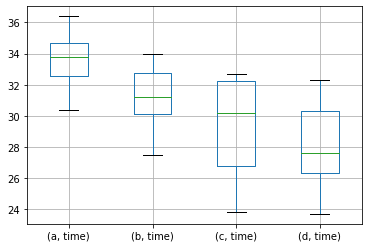

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
df=pd.read_csv('C:\\Users\\Administrator\\Untitled Folder\\statistics_1day\\ANOVA.csv')
df.groupby('gangjong').boxplot(['gangjong','time'])

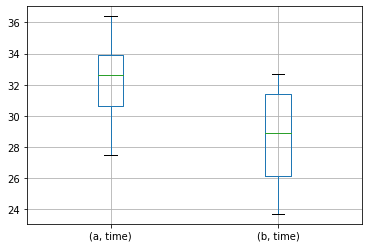

In [109]:
df.groupby('type').boxplot(['type','time'])

In [119]:
fg = stats.f_oneway(df[df['gangjong']=='a']['time'],df[df['gangjong']=='b']['time'],df[df['gangjong']=='c']['time'],df[df['gangjong']=='d']['time'])
fgt,pgt = fg.statistic.round(3), fg.pvalue.round(3)
print("One-way")
print("F 통계량 : {}".format(f))
print("p-value:{}".format(p))

One-way
F 통계량 : 4.263
p-value:[0.111]


In [121]:
ft = stats.f_oneway(df[df['type']=='a']['time'],df[df['type']=='b']['time'])
ftt, ptt = ft.statistic.round(3), ft.pvalue.round(3)
print("One-way")
print("F 통계량 : {}".format(ftt))
print("p-value:{}".format(ptt))

One-way
F 통계량 : 9.654
p-value:0.005


### 1. ANOVA 분석이란?
#### 비교대상이 되는 집단들 간의 평균의 차이를 검정하기 위해 총변동의 요인의 수준차이로 설명되는 변동과
#### 설명될 수 없는 변동으로 분해하여 이 두 변동의 비가 통계적으로 유의한지를 검정하는 분석방법
#### 세(두)개 이상의 표본평균을 동시에 비교하는 분석기법
### 2. 검정
#### 1) 가설 수립 및 유의수준 설정
#### 귀무가설(H0) : 수준별 평균의 차이가 없다.
#### 대립가설(H1) : 평균의 차이가 있는 수준이 적어도 하나 존재한다.
#### 유의수준(α) : 0.05 -> 일반적으로 쓰는 유의수준 %를 따랐다.
#### 2) 가설검정 수행
#### p-value값으로 어떤 요소가 다른지는 확인할 수 없으므로 boxplot을 그려서 개략적으로 확인한다.
#### 그룹 내 변동이 커지면 차이가 있다. 그룹 내 변동이 작아져야 차이가 있다.
#### 강종별 F값과 p-value값을 구했더니 각각 4.172와 0.019가 나왔다.
#### type별 F값과 p-value값을 구했더니 각각 9.654와 0.005가 나왔다.
#### 3) 검정결과 판단
#### p-value(0.019)<유의수준(0.05)이므로 H0을 기각한다.
#### p-value(0.005)<유의수준(0.05)이므로 H0을 기각한다.
### 3. 결론
#### 유의수준 5%에서 검정결과 p값이 0.019이므로 강종별에 따라 2차정련 시간에 차이가 있다고 볼 수 있다.
#### 유의수준 5%에서 검정결과 p값이 0.005이므로 타입별에 따라 2차정련 시간에 차이가 있다고 볼 수 있다.
#### 따라서, 평균의 차이가 있는 수준이 하나라도 존재하므로 대립가설을 채택하고, 강종별과 type에 따라 2차정련 시간에 차이가 있다고 볼 수 있다.


## 실습 8) 상관분석

### 초코칩의 강도와 재료 반죽온도간에 관계를 분석하기 위한 상관분석을 하세요

In [101]:
import seaborn as sns
df1=[37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5]
df2=[14, 15, 14, 16, 17, 14, 17, 16, 15, 16, 14, 16, 18, 13, 15, 17, 14, 16, 20, 21]

corr, pval=stats.pearsonr(df1,df2)
# 상관계수와 p - value를 구한다.
print("Correlation Analysis")
print('corr:{0:0.3f}'.format(corr))
print('p-value:{0:0.3f}'.format(pval))

Correlation Analysis
corr:-0.723
p-value:0.000


### 1. 상관분석이란?
#### 두 수량형 변수간에 선형적 관계의 강도와 방향을 분석하는 통계방법
#### 공분산 : 둘 이상의 변량이 연관성을 가지며 분포하는 모양을 전체적으로 나타낸 분산
#### 상관계수 : 두 변수 간의 선형적인 관계 정도와 방향을 수치로 표시한 표준화된 지수
### 2. 검정
#### 1) 가설 수립 및 유의수준 설정
#### 귀무가설(H0) : 초코칩의 강도와 재료 반죽온도간에 상관성이 없다고 할 수 있다. -> 상관분석에서 귀무가설(H0)은 상관성이 없다고 가정
#### 대립가설(H1) : 초코칩의 강도와 재료 반죽온도간에 상관성이 있다고 할 수 있다. -> H0의 반대 가설
#### 유의수준(α) : 0.05 -> 일반적으로 쓰는 유의수준 %를 따랐다.
#### 2) 가설검정 수행
#### 데이터로부터 상관계수, p-value를 구한다.
#### 3) 검정결과 판단
#### 상관계수 corr=-0.723, p-value=0.000 값이 나왔다.
#### corr 값이 음수이므로 공분산은 반대 방향으로 증가하는 직선의 형태를 띌 것이다. 온도가 증가할수록 강도는 줄어든다고 볼 수 있다.
#### p-value값이 0에 근사므로 유의수준(α=0.05%)보다 작으므로 H0을 기각한다. 
### 3. 결론
#### 유의수준 5%에서 초코칩의 강도와 재료 반죽온도간에 "중간보다 강한 상관성"이 있다고 할 수 있다.

## 실습 9) 단순선형회귀

### 초코칩의 강도와 굽는 시간과의 인과관계를 분석하기 위한 회귀분석 실시와 회귀식 도출

In [86]:
## 패키지 불러오기
# 데이터 구성 : Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np
# 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1+X2+...)
import statsmodels.formula.api as smf
# jupyter notebook 사용 시 그래프 자동 출력 옵션
%matplotlib inline
# 한글 폰트 적용
# matplotlib.rc("font", family="Malgun Gothic")

# ① 데이터 구성하기
# 파일명, 변수, 값 등에 한글 포함시 engine="python" 지정
df=pd.DataFrame({'Strength':[37.6, 38.6, 37.2, 36.4, 38.6, 39, 37.2, 36.1, 35.9, 37.1, 36.9, 37.5, 36.3, 38.1, 39, 36.9, 36.8, 37.6, 33, 33.5], 
                 'Bakingtime':[0.798922, 0.84902, 0.816163, 0.758266, 0.815894, 0.807477, 0.809068, 0.7664, 0.742243, 0.751118, 0.740629, 0.751495, 0.738863, 0.827428, 0.818172, 0.740939, 0.757128, 0.804695, 0.695121, 0.735377]})

# ② 변수 간의 경향성 파악
# 요약통계량
df.describe().round(3)

,Strength,Bakingtime
count,20.000,20.000
mean,36.965,0.776
std,1.565,0.041
min,33.000,0.695
25%,36.375,0.742
50%,37.150,0.762
75%,37.725,0.811
max,39.000,0.849


AxesSubplot(0.125,0.125;0.775x0.755)


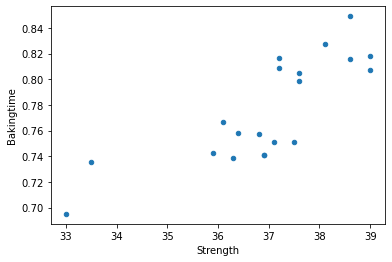

In [99]:
# 목표변수와 설명변수의 산점도
print(df.plot.scatter(x="Strength", y="Bakingtime"))


# 연속형 변수 간의 관계, 패턴 확인을 위해 그래프로 확인. 산점도를 확인해보니 설명변수 값 증가시 목표변수 값도 증가함을 알 수 있음.

In [88]:
# 목표변수와 설명변수의 상관계수
print(df.corr(method="pearson").round(3))


# corr값은 0.804값이 나왔는데 선형적 상관관계가 큰 것을 알 수 있음

            Strength  Bakingtime
Strength       1.000       0.804
Bakingtime     0.804       1.000


In [90]:
# ③ 회귀 모델 생성
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 상수항(Intercept)은 자동으로 추가됨
reg_model=smf.ols(formula="Strength ~ Bakingtime", data=df)
reg_result=reg_model.fit()
print(reg_result.summary())


# No.Observations(분석 자료 수) : 20
# Df Residuals(잔차 자유도) : 18
# Df Model(모델 자유도) : 1
# 분산분석 결과 : p값이 유의수준 0.05보다 작으므로 회귀모델로서 유의(p=0.00002)
# 설명력 : R-squared는 0.646으로 초코칩 강도로 굽는 시간의 변동의 64.6%를 설명할 수 있음
# 회귀계수 검정 : 절편의 유의성은 검토하지 않음. 회귀식에는 절편의 유의성 상관없이 절편 포함. 초코칩 강도의 p값이 유의수준 0.05보다 작으므로 유의

                            OLS Regression Results                            
Dep. Variable:               Strength   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.90
Date:                Wed, 12 May 2021   Prob (F-statistic):           1.95e-05
Time:                        22:17:22   Log-Likelihood:                -26.431
No. Observations:                  20   AIC:                             56.86
Df Residuals:                      18   BIC:                             58.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.0013      4.184      3.108      0.0

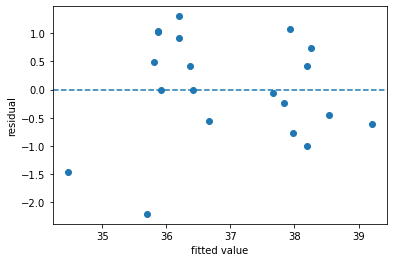

In [93]:
# ④ 오차의 기본가정 검토
# 잔차의 등분산성: X-예측값, Y-잔차
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel("fitted value"); plt. ylabel("residual")
plt.axhline(y=0, linestyle="--")

# 잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 등분산성 만족

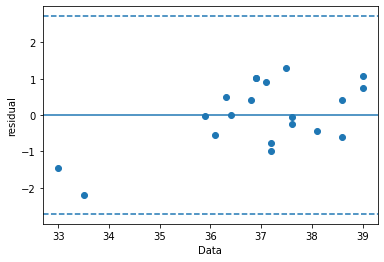

In [94]:
# 잔차의 독립성
plt.scatter(df["Strength"], reg_result.resid, marker="o")
plt.xlabel("Data")
plt.ylabel("residual")
plt.axhline(y=0, linestyle="-")
plt.axhline(y=3*np.std(reg_result.resid), linestyle="--")
plt.axhline(y=-3*np.std(reg_result.resid), linestyle="--")

# 잔차가 y=0을 기준으로 Random하게 산포되어 있으므로 독립성 만족

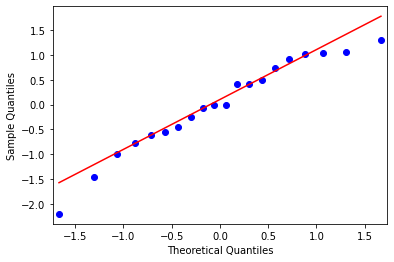

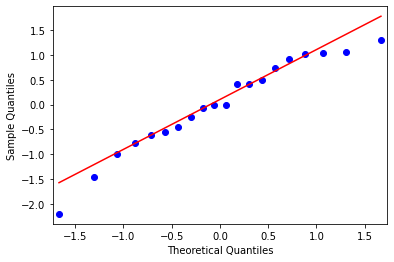

In [98]:
# 잔차 정규성 검정 : Q-Q plot, s-standardized line
# r-regression line, q-quartiles
qqplot(reg_result.resid, line="q")

# 정규분포 직선(적색 선)을 중심으로 분포하고 검정. 통계량이 귀무가설을 채택하므로 정규분포를 따름

#### ⑤ 결론 도출
#### - 최종 회귀식
#### y(hat) = 13.0013 + 30.8722 * Strength
#### -> 초코칩 강도 1단위 증가할 때마다 굽는 시간은 30.9분 증가

#### - 초코칩 수가 18개일 때 예상 굽는 시간은?
#### y(hat) = 13.0013 + 30.8722 * 18 = 568.701 Minutes